# 🧠 Customer Segmentation & Business Strategy Project
## RFM Analysis
---
This project performs RFM segmentation and provides actionable business insights.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10,6)

## 📂 Load Dataset

In [2]:
df = pd.read_excel('Online Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## 🧹 Data Cleaning

In [3]:
df.dropna(subset=['CustomerID'], inplace=True)
df = df[df['Quantity'] > 0]
df = df[df['UnitPrice'] > 0]

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Revenue'] = df['Quantity'] * df['UnitPrice']

df.shape

(397884, 9)

## 📊 RFM Calculation

In [4]:
snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'Revenue': 'sum'
})

rfm.columns = ['Recency', 'Frequency', 'Monetary']
rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,7,4310.00
12348.0,75,4,1797.24
12349.0,19,1,1757.55
12350.0,310,1,334.40


## 🏷️ RFM Scoring (Numeric Safe Version)

In [5]:
rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, labels=[5,4,3,2,1]).astype(int)
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1,2,3,4,5]).astype(int)
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 5, labels=[1,2,3,4,5]).astype(int)

rfm['RFM_Score'] = rfm['R_Score'] + rfm['F_Score'] + rfm['M_Score']
rfm.head()

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
CustomerID,,,,,,,
12346.0,326,1,77183.60,1,1,5,7
12347.0,2,7,4310.00,5,5,5,15
12348.0,75,4,1797.24,2,4,4,10
12349.0,19,1,1757.55,4,1,4,9
12350.0,310,1,334.40,1,1,2,4


## 🎯 Customer Segmentation

In [6]:
def segment(row):
    if row['RFM_Score'] >= 13:
        return 'VIP Customers'
    elif row['RFM_Score'] >= 10:
        return 'Loyal Customers'
    elif row['RFM_Score'] >= 7:
        return 'Potential Loyalists'
    elif row['RFM_Score'] >= 5:
        return 'At Risk'
    else:
        return 'Lost Customers'

rfm['Segment'] = rfm.apply(segment, axis=1)
rfm['Segment'].value_counts()

Segment
Potential Loyalists    1092
Loyal Customers        1008
VIP Customers           934
At Risk                 759
Lost Customers          545
Name: count, dtype: int64

## 📈 Revenue Contribution by Segment

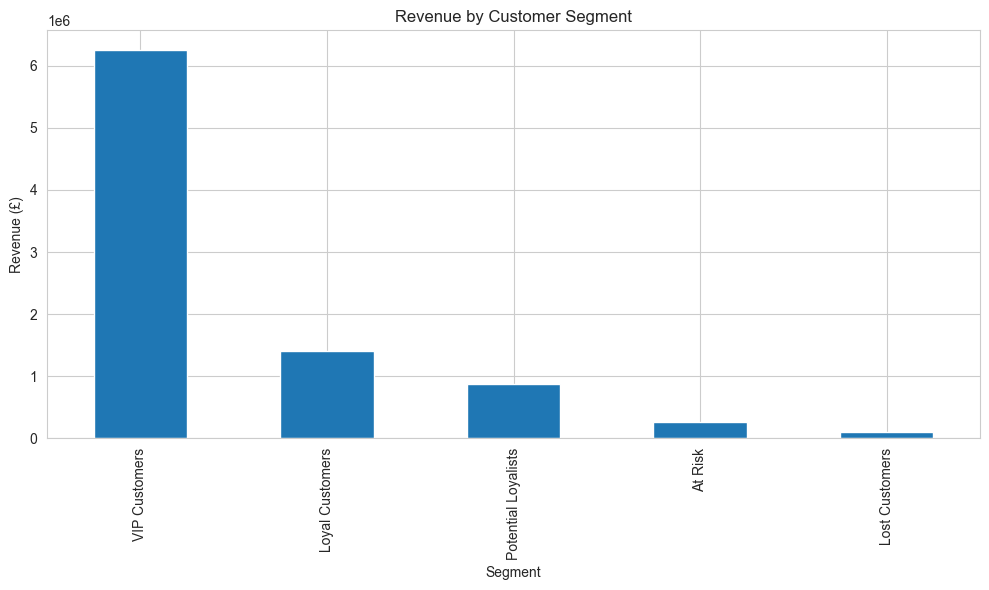

Segment
VIP Customers          6255336.530
Loyal Customers        1408629.911
Potential Loyalists     882612.662
At Risk                 259877.891
Lost Customers          104950.910
Name: Monetary, dtype: float64

In [7]:
segment_revenue = rfm.groupby('Segment')['Monetary'].sum().sort_values(ascending=False)

segment_revenue.plot(kind='bar')
plt.title('Revenue by Customer Segment')
plt.ylabel('Revenue (£)')
plt.tight_layout()
plt.show()

segment_revenue

---
## 💼 Business Strategy Recommendations

### 🏆 VIP Customers
- Exclusive loyalty rewards
- Early product launches

### 💎 Loyal Customers
- Cross-selling & upselling

### ⚠️ At Risk Customers
- Re-engagement email campaigns

### ❌ Lost Customers
- Win-back offers & feedback surveys

---
## 🚀 End of Project